## Геометрический смысл линейной комбинации

https://habr.com/ru/post/324736/

Гиперплоскость делит гиперпространство на два гиперподпространства. Так вот точки, находящиеся в одном из этих подпространств (условно говоря «выше» гиперплоскости), и точки, находящиеся в другом из этих подпространств (условно говоря «ниже» гиперплоскости), будут в этой сумме давать разный знак:

w^T x + b > 0 — точка лежит «выше» гиперплоскости
w^T x + b < 0 — точка лежит «ниже» гиперплоскости

Значение по модулю определяет удалённость точки от плоскости:

$$dist(x)=\frac{|w^T x + b|}{||w||}$$

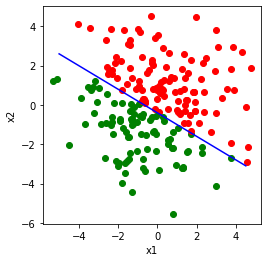

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# линия: w1 * x1 + w2 * x2 + b = 0
def line(x1, x2):
    return -3 * x1 - 5 * x2 - 2

# x2 = f(x1)
def line_x1(x1):
    return (-3 * x1 - 2) / 5

# генерируем диапазон точек
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# рисуем точки
for x1, x2 in x1x2:
    value = line(x1, x2)

    if value == 0: # синие — на линии
        plt.plot(x1, x2, 'ro', color='blue')
    elif value > 0: # зелёные — выше линии
        plt.plot(x1, x2, 'ro', color='green')
    elif value < 0: # красные — ниже линии
        plt.plot(x1, x2, 'ro', color='red')

# выставляем равное пиксельное разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')
            
# рисуем саму линию
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# на экран!
plt.show()

Т.о. знак линейной комбинации позволяет отнести точку к верхнему или нижнему подпространству.

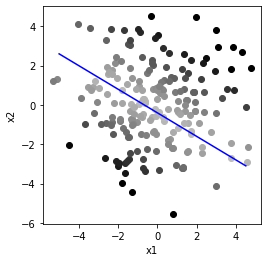

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# линия: w1 * x1 + w2 * x2 + b = 0
def line(x1, x2):
    return -3 * x1 - 5 * x2 - 2

# x2 = f(x1) (для наглядности)
def line_x1(x1):
    return (-3 * x1 - 2) / 5

# генерируем диапазон точек
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# рисуем точки
for x1, x2 in x1x2:    
    value = line(x1, x2)

    # цвет тем тенее, чем меньше значение — поэтому минус
    # коэффициенты — чтобы попасть в диапазон [0, 0.75]
    # чёрный (0) — самые удалённые точки, светло-серый (0.75) — самые близкие
    color = str(max(0, 0.75 - np.abs(value) / 30))

    plt.plot(x1, x2, 'ro', color=color)
        
# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')
        
# рисуем саму линию
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# на экран!
plt.show()

#### Выводы

* Линейная комбинация позволяет разделить n-мерное пространство гиперплоскостью.
* Точки по разные стороны гиперплоскости будут иметь разный знак линейной комбинации.
* Чем точка удалённее от гиперплоскости, тем абсолютное значение линейной комбинации будет больше.

С точки зрения бинарной классификации последнее утверждение можно переформулировать следующим образом. Чем удалённее точка от гиперплоскости, являющейся границей решений (decision boundary), тем увереннее мы в том, что наш образец (sample) определяемый этой точкой попадает в тот или иной класс.

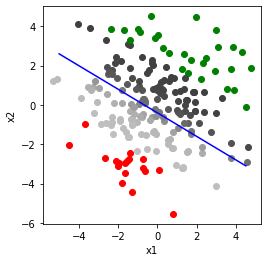

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# логистическая функция
def logit(x):
    return 1 / (1 + np.exp(-x))

# линия: w1 * x1 + w2 * x2 + b = 0
def line(x1, x2):
    return 3 * x1 + 5 * x2 + 2

# x2 = f(x1)
def line_x1(x1):
    return (-3 * x1 - 2) / 5

# генерируем диапазон точек
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# рисуем точки
for x1, x2 in x1x2:    
    # деление добавляется для наглядности
    value = logit(line(x1, x2) / 2)

    if value < 0.001:
        color = 'red'
    elif value > 0.999:
        color = 'green'
    else:
        color = str(0.75 - value * 0.5)

    plt.plot(x1, x2, 'ro', color=color)
        
# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')
        
# рисуем саму линию
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Красные — точно нет (false, точно брак, точно не кликнет). Зелёные — точно да (true, точно годится, точно кликнет). Всё, что в определённом диапазоне близости от гиперплоскости (граница решений) получает некоторую вероятность. На самой прямой вероятность ровно 0.5.

P.S. «Точно» здесь определяется как меньше 0.001 или больше 0.999. Сама логистическая функция стремится к нулю на минус бесконечности и к единице на плюс бесконечности, но никогда этих значений не принимает.

## 2.1 Какие параметры в такой нейронной сети мы сможем настраивать? 

Во-первых, это веса, которые взвешивают входные значения в первый и единственный в этой нейронной сети скрытый слой. 
Эти веса будут отвечать за то, насколько круто будет расти соответствующая сигмоида. 

Если, например, значение веса будет большое (например, вот этот вес большой), 
это означает, что сигмоида, которая получается в результате работы первого нейрона, 
будет очень быстро переходить от значения 0 к значению 1. 

Если например w2 первого слоя будет меньше, чем w1 первого слоя, 
это будет означать, что вторая сигмоида будет расти медленнее, чем первая сигмоида. 

Кроме весов первого слоя, мы можем в этой сети также настраивать смещения первого слоя. 
Смещения первого слоя будут регулировать, насколько влево или вправо сдвинуть соответствующую сигмоиду. 
Если, например, первое смещение будет достаточно большим положительным числом, это означает что мы эту сигмоиду смещаем далеко влево. 
Если значение смещения будет большим отрицательным числом, то это означает что соответствующую сигмоиду мы сносим далеко вправо. 

Кроме весов первого слоя и смещений первого слоя, мы можем настраивать веса и смещение 2 слоя. 
Что будут делать веса 2 слоя? 
Рассмотрим сигмоиду. Сигмоида -- эта функция, которая переходит между нулём и единицей. 
При −∞ она равна 0, при +∞ она равна 1, и она монотонно возрастает. 
Если мы домножим такую функцию на некоторое значение w, 
то такая функция изменится, и теперь она будет возрастать от 0 до значения w. 
Таким образом веса 2 слоя будут обозначать амплитуду соответствующей сигмоиды. 
И помимо весов второго слоя мы ещё можем настраивать смещения 2 слоя.

## 2.3 Алгоритм настройки нейронной сети

Мы с вами рассмотрели процесс градиентного спуска: как он происходит и что нужно для того чтобы его осуществить. 

Чтобы его осуществить, нам необходимо знать производную функции потерь по всем параметрам нейронной сети. 
Иными словами, для того чтобы осуществить процесс градиентного спуска, нам необходимо знать, в какую сторону и насколько нужно крутить ручки чёрного ящика, для того чтобы улучшить функцию потерь. 

Итак, какие ограничения накладываются на функцию потерь, чтобы мы могли при помощи этой функции потерь обучать нейронную сеть. 

Во-первых, функция потерь должна быть дифференцируема. То есть мы должны, при любых параметрах, уметь вычислить производную лосс-функции по всем параметрам нейронной сети. Однако если, например, в какой-то точке или в каком-то небольшом множестве точек (множестве точек меры 0 например), производная не определена, то можно её до-определить для того, чтобы мы могли вычислить производную в любой.

Во-вторых производная функции потерь, в каком-то достаточно большом множестве точек, должна быть равна не нулю, а какому-то значению. Дело в том что если производная функции потерь будет равна нулю практически во всех точках, то это означает, что практически во всех точках такая функция потерь будет неинформативна – она нам не будет говорить, в какую сторону нужно подстроить параметры для того, чтобы нейронная сеть лучше решала поставленную перед ней задачу. 

Именно поэтому функция потерь "точность" – это плохая функция потерь: при помощи этой функции потерь мы не сможем ничего обучить. И именно поэтому в задачах регрессии, то есть задачах восстановления какой-то зависимости, используют функцию потерь, которая называется "средний квадрат ошибки". 

В чём дело? Вот у нас функция "средний квадрат ошибки". Возьмём производную от этой функции потерь по выходу из нейронной сети. Производная по выходу из нейронной сети функции потерь "средний квадрат ошибки" будет равна: 
```
-2/N ⋅ (yi - ~yi),
```
где 1) ~yi – это то, что нам выдала нейронная сеть в качестве ответа, 
и 2) yi – это то, что она должна была выдать – эта метка, которая была нами померена ранее для этого объекта. 

Таким образом практически при любых параметрах у нас получится какая-то ненулевая производная, кроме тех случаев, когда мы идеально решаем нашу задачу. Именно в этих случаях производная будет равна нулю потому что все вот эти компоненты будут равны нулю. 

Подытоживая, можно сказать, что следующие ограничения накладываются на функцию потерь: 
1. Функция потерь должна быть в большом наборе точек дифференцируемой.
2. Функция потерь должна быть в большом наборе точек не равной нулю. В этом случае мы сможем как-то обучать нашу нейронную сеть. В ином случае, если у нас практически всегда производная будет либо не определена, либо равна нулю -- в этом случае мы не сможем ничему обучить нашу нейронную сеть, потому что мы просто не сможем сделать ни одного шага при помощи алгоритма градиентного спуска.

### ***

Из-за чего происходит отклонение наблюдаемых значений от идеальной, теоретической зависимости?
* человеческий фактор: человек неправильно произвёл измерения
* наблюдаемая величина может случайным образом отклоняться от средних значений
* измерительный прибор был плохо откалиброван в конкретном эксперименте
* мы учитываем недостаточный набор параметров

## 2.5 Восстановление зависимостей

Таким образом, через все точки выборки (всего N штук) может проходить бесконечное число полиномов степени M при M > N.

Так и в нейронных сетях: если данных мало, а параметров слишком много, то возможна ситуация, когда не единственный набор параметров решает задачу.

Это очень вредная ситуация, поскольку, если нейронная сеть очень хорошо приблизила тренировочные точки, cовсем не ясно, как она поведет себя на тестовых данных.

Более того, поскольку решений оптимизационной задачи в такой ситуации бесконечно много, то на тестовых данных она может работать бесконечно плохо.

Такая ситуация называется переобучение.

## 2.6 Градиентный спуск

Вы знаете уже, что есть такой "метод градиентного спуска". 
Он нужен для оптимизации -- для нахождения минимума функции. 
И он умеет находить локальный минимум функции (к сожалению, про глобальный он ничего не говорит).

Если мы захотим найти локальный минимум функций, то мы можем действовать следующим образом. 
1) Возьмём некоторое начальное приближение "x_t", это будет наша какая-то точка. Сначала она может быть выбрана случайным образом.

2) Посчитаем производную "f' (x_t)", то есть производную в этой точке функции "f", и она нам покажет направление наискорейшего роста функции.

3) А нам нужно в минимум, соответственно, нам нужно взять эту производную с минусом.

4) Но если мы просто возьмём производную, это может быть очень большое значение. Надо его домножить на некоторую константу. Эта константа называется "альфа", или "learning rate", или шаг градиентного спуска. Обычно она выбирается где-то: 1e-3, 1e-4. Её можно потом изменять в ходе грандиентного спуска, но скажем пока, что это некоторая константа "альфа".

5) Домножим нашу производную "f'(x_t)" в точке "x_t" на эту "альфу" и скажем, что наше следующее приближение, точка в которой мы хотим находиться: "x_(t+1)" -- это точка, которая отличается от "x_t" на это значение. И новое значение функции на первом шаге, соответственно, вычисляется таким же образом.

## ***

yk — это оценка нейронной сетью вероятности класса k. Этот результат следует из каких-то вычислений внутри сети, а эти вычисления опираются на веса W. 

Чтобы улучшить качество работы сети, нам эти веса нужно менять, а чтобы понять, как их менять, мы считаем производные по вероятностям всех классов и получаем градиент функции по этим вероятностям. Его мы используем (см. backpropagation), чтобы понять, как веса W влияют на работу сети, и получаем градиент уже по ним. Теперь, прибавив к текущему значению W отрицательный градиент, домноженный на коэффициент (см. learning rate), получаем значение W, при котором значение функции потерь стало меньше.

### Dense

The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer.

In the background, the dense layer performs a matrix-vector multiplication. The values used in the matrix are actually parameters that can be trained and updated with the help of backpropagation.

The output generated by the dense layer is an ‘m’ dimensional vector. Thus, dense layer is basically used for changing the dimensions of the vector. Dense layers also applies operations like rotation, scaling, translation on the vector.

```units``` – The most basic parameter of all the parameters, it uses positive integer as it value and represents the output size of the layer.

https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/#What_is_a_Dense_Layer_in_Neural_Network

Dense implements the operation: ```output = activation(dot(input, kernel) + bias)``` where ```activation``` is the element-wise ```activation``` function passed as the activation argument, ```kernel``` is a weights matrix created by the layer, and bias is a ```bias``` vector created by the layer (only applicable if ```use_bias``` is ```True```).

https://keras.io/api/layers/core_layers/dense/

### Dropout

Dropout Layer is one of the most popular regularization techniques to reduce overfitting in the deep learning models. Overfitting in the model occurs when it shows more accuracy on the training data but less accuracy on the test data or unseen data.

In the dropout technique, some of the neurons in hidden or visible layers are dropped or omitted randomly. The experiments show that this dropout technique regularizes the neural network model to produce a robust model which does not overfit.

```rate``` − This represents the fraction of the input unit to be dropped. It will be from 0 to 1.

https://machinelearningknowledge.ai/keras-dropout-layer-explained-for-beginners/

## Свёртка

В математическом отношении в двумерной свертке нет ничего сложного. Имеется ядро – небольшая матрица весов. Это ядро «скользит» по двумерным входным данным, выполняя поэлементное умножение для той части данных, которую сейчас покрывает. Результаты перемножений ячеек суммируются в одном выходном пикселе. В случае сверточных нейросетей ядро определяется в ходе обучения сети. Начальные веса, аналогично случаю перцептрона, могут иметь случайные значения, и корректируются в процессе обучения.

Такой подход контрастирует с полносвязными сетями. Так, в приведенном выше примере имеется 5×5=25 входных признаков и 3×3=9 выходных. Если бы это были два полносвязных слоя, весовая матрица состояла бы из 25×9=225 весовых параметров. При этом каждая функция вывода была бы взвешенной суммой всех входов. В случае свертки, взвешенная сумма берется только по числу весов ядра. И в рассмотрении одновременно участвуют только близлежащие элементы.

Обратим внимание на два характерных метода, связанных с операцией свертки: дополнение отступа (padding) и выбор шага (strides).

#### Нулевой отступ

В вышеприведенном примере скольжение ядра «обрезает» исходный двумерный массив по краю, преобразуя матрицу 5×5 в 3×3. Краевые пиксели теряются из-за того, что ядро не может распространяться за пределы края. Однако иногда необходимо, чтобы размер выходного массива был тем же, что и у входных данных.

Чтобы решить эту задачу, исходный массив можно дополнить «поддельными» пикселями. Например, в виде краевого поля, окружающего массив. Если в качестве значений берутся нули, говорят о «нулевом отступе» (zero padding).

#### Многоканальная версия – цветные изображения

Вышеприведенные диаграммы соответствуют лишь изображениям с одним входным каналом. На практике большинство изображений имеют три канала: красный, зеленый и синий

В случае с одним каналом термины фильтр и ядро взаимозаменяемы. Для цветного изображения они различны. Фильтр – это коллекция ядер, каждое из которых соответствует одному каналу. Ядро фильтра скользит по данным канала, создавая их обработанную версию. Значимость ядер определяется взаимным отношением их весов. Например, ядро для красного канала может быть более значимым в модели, чем другие ядра фильтра, тогда будут больше и соответствующие веса.

Каждая из обработанных в своих каналах версий суммируется для формирования общего канала.

https://proglib.io/p/convolution/

Обычно мы обучаем не одно ядро, а иерархию нескольких ядер одновременно. Например, применение ядра 32×16×16 к изображению 256×256 даст 32 карты признаков размером 241×241 (это стандартное соотношение: размер изображения - размер ядра + 1). Таким образом, мы автоматически изучим 32 новых признака с информацией для нашей задачи. Они используются в качестве входных данных для следующего ядра, которое снова применяет к ним фильтр. Как только мы изучим всю иерархию, мы просто передадим её в простую нейросеть, которая объединит признаки для классификации входного изображения. Это почти всё, что нужно знать о свёрточных сетях на концептуальном уровне.

https://www.reg.ru/blog/svyortka-v-deep-learning-prostymi-slovami/

### Подвыборка (Pooling)

Pooling is basically "downscaling" the image obtained from the previous layers. It can be compared to shrinking an image to reduce its pixel density. The avg for each block is computed.

When applying Global Average Pooling, the pool size is still set to the size of the layer input, the average of the pool is taken.

They’re often used to replace the fully-connected or densely-connected layers in a classifier. Instead, the model ends with a convolutional layer that generates as many feature maps as the number of target classes, and applies global average pooling to each in order to convert each feature map into one value. As feature maps can recognize certain elements within the input data, the maps in the final layer effectively learn to “recognize” the presence of a particular class in this architecture. By feeding the values generated by global average pooling into a Softmax activation function, you once again obtain the multiclass probability distribution that you want.

https://www.machinecurve.com/index.php/2020/01/30/what-are-max-pooling-average-pooling-global-max-pooling-and-global-average-pooling/#what-are-pooling-operations

Сейчас мы рассмотрим вторую фундаментальную концепцию лежащую в основе свёрточных нейронных сетей — операцию подвыборки (pooling, max-pooling). Простыми словами, операция подвыборки это процесс сжатия (уменьшения размеров) изображения путём сложения значений блоков пикселей. Давайте рассмотрим как это работает на конкретном примере.

Чтобы выполнить операцию подвыборку нам необходимо определиться с двумя составляющими этого процесса — размером выборки (размером прямоугольной сетки) и величиной шага. В этом примере мы будем использовать прямоугольную сетку размером 3х3 и шагом 3. Шаг определяет количество пикселей на которые необходимо сдвигать прямоугольную сетку при выполнении операции подвыборки.

После того как мы определились с размером сетки и размером шага нам необходимо найти максимальное значение пикселя попадающее в выделенную сетку. В пример выше в сетку попадают значения 1, 0, 4, 8, 2, 5, 20, 13, 25. Максимальное значение — 25. Это значение «переносится» в новое изображение. Сетка сдвигается на 3 пикселя вправо и процесс выборки максимального значения и его переноса на новое изображение повторяется.

В результате будет получено изображение меньшего размера по сравнению с оригинальным входным изображением. В нашем примере было получено изображение, которое в два раза меньше нашего исходного изображения. Размер итогового изображения будет варьироваться в зависимости от выбора размера прямоугольной сетки и размера шага.

https://habr.com/ru/post/454986/

## ***

СНС — свёрточные нейронные сети. Нейронная сеть, которая содержит хотя бы один свёрточный слой. Типичная СНС содержит и другие слои, такие как слои выборки и полносвязные слои.

Свёртка — процесс применения фильтра («ядра») к изображению.

Фильтр (ядро) — матрица, по размерам меньше, чем входные данные, предназначенная для преобразования входных данных блоками.

Шаг — количество пикселей смещения фильтром (ядром) на изображении.

## Улучшенная оптимизация

К счастью, есть очень простая стратегия, решающая большинство проблем. Её идея в том, чтобы сохранить скорость градиентного спуска, добавив для этого некоторый импульс (momentum). Теперь вместо простого итеративного вычисления градиента мы прибавляем к нему подсчёт скорости и дописываем две строки в наш код.

![](https://lh3.googleusercontent.com/lvmNeROY5eXT27B8duVju_qSctnIGkyody3X9pQIsJS2uarplGrqmoJLbCWzZnKktGS7rY89UJHyNhca3WgBmJQaWrtQRtGpQnL2Rsp3SXMQhTkv3--7KQeBeuVXWzo2176tVWEs)

Таким образом, мы будем двигаться в направлении изменения скорости, а не в направлении градиента. Гиперпараметр rho соответствует трению, как при движении по твёрдой поверхности.

Что же теперь произойдёт в локальном минимуме или седловой точке? Здесь можно провести аналогию с шариком, который катится с горки. Как только он дойдёт до точки, где градиент равен нулю, он по-прежнему сохранит некоторую скорость и будет двигаться дальше.

https://www.reg.ru/blog/stehnfordskij-kurs-lekciya-7-obuchenie-nejrosetej-chast-2/

### Adam

Стохастический градиентный спуск поддерживает единую скорость обучения (называемую альфа) для всех обновлений веса, и скорость обучения не изменяется во время тренировки. Скорость обучения поддерживается для каждого веса сети (параметра) и отдельно адаптируется по мере развития обучения. Метод вычисляет индивидуальные адаптивные скорости обучения для различных параметров из оценок первого и второго моментов градиентов.

Adam объединяет в себе преимущества RMSProp, AdaGrad и SGD+Momentum. Сначала мы выполняем оценку первого импульса и взвешенной суммы градиентов, а затем оцениваем второй импульс и квадрат градиентов. Первый импульс играет роль скорости, а второй служит для оптимизации параметров.

Изначально оба параметра равны нулю, поэтому к ним добавляется корректирующее смещение, чтобы избежать слишком большого шага в самом начале.

https://www.reg.ru/blog/stehnfordskij-kurs-lekciya-7-obuchenie-nejrosetej-chast-2/

## Эпоха

Произошла одна эпоха (epoch) — весь набор данных прошёл через нейронную сеть в прямом и обратном направлении только один раз.

Нужно помнить, что мы используем ограниченный датасет, чтобы оптимизировать обучение и подстроить кривую под данные. Делается это с помощью градиентного спуска — итеративного процесса. Поэтому обновления весов после одного прохождения недостаточно.

Одна эпоха приводит к недообучению, а избыток эпох — к переобучению:

С увеличением числа эпох, веса нейронной сети изменяются все большее количество раз. Кривая с каждый разом лучше подстраивается под данные, переходя последовательно из плохо обученного состояния (последний график) в оптимальное (центральный график). Если вовремя не остановиться, то может произойти переобучение (первый график) — когда кривая очень точно подстроилась под точки, а обобщающая способность исчезла.

Партия (batch) — нельзя пропустить через нейронную сеть разом весь набор данных. Поэтому делим данные на пакеты, сеты или партии, так же, как большая статья делится на много разделов — введение, градиентный спуск, эпохи, batch size и итерации. Такое разбиение позволяет легче прочитать и понять статью.

Итерации — число батчей, необходимых для завершения одной эпохи. Отметим: Число батчей равно числу итераций для одной эпохи. Например, собираемся использовать 2000 тренировочных объектов. Можно разделить полный датасет из 2000 объектов на батчи размером 500 объектов. Таким образом, для завершения одной эпохи потребуется 4 итерации.

https://neurohive.io/ru/osnovy-data-science/jepoha-razmer-batcha-iteracija/